In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Kde: Kernel density estimation.
#### 1.1. Define a class & some relative_kernel

In [21]:
from all_of_my_classes import *
pi = np.pi

#### 1.2. Implementation

{'kernel': 'gauss', 'normed': True}
0.08164965809277261


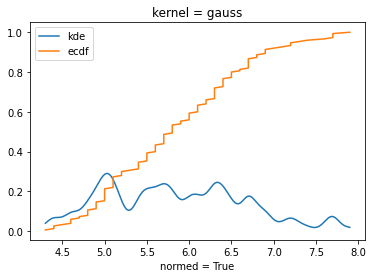

In [22]:
iris = sns.load_dataset("iris")
x = iris.sepal_length

kde = kernel_density_est(x, normed = True, kernel_type = "gauss")
print(kde.get_params())
print(kde.get_bins())
kde.display()
kde.show_ecdf()

#### Wraping-up

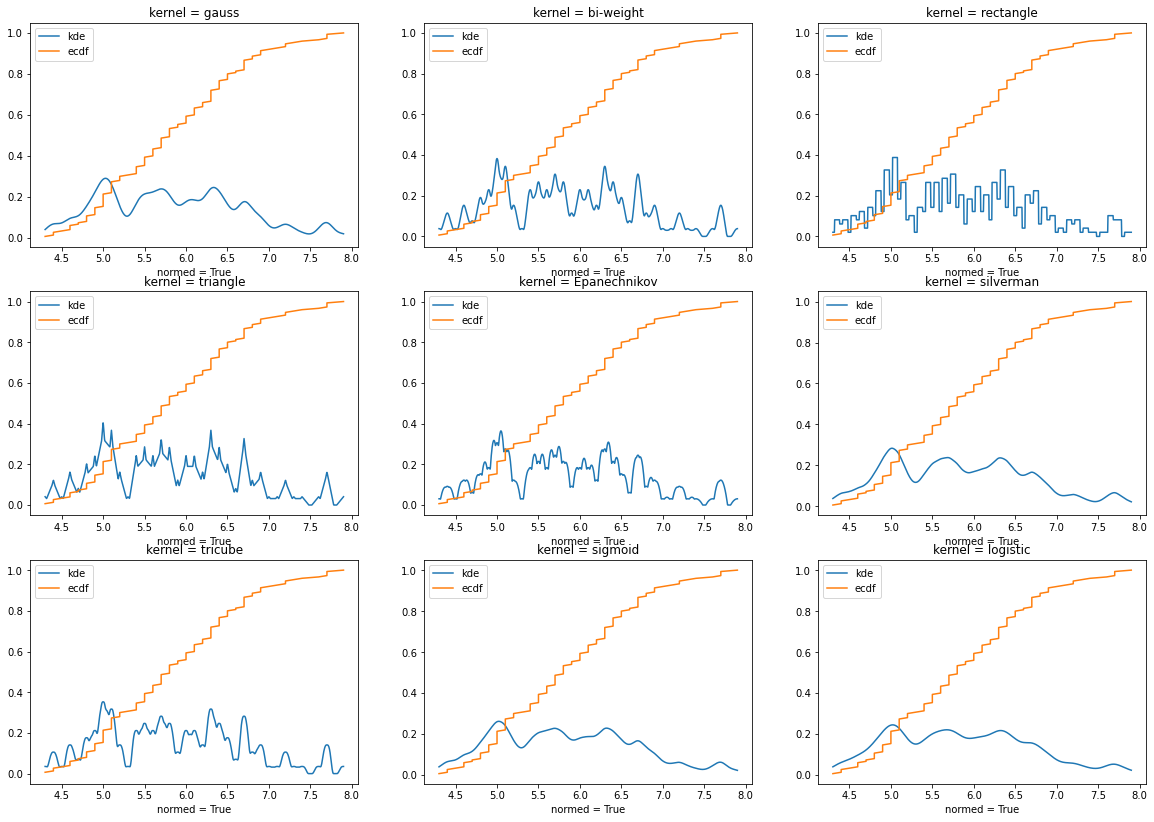

In [23]:
plt.figure(figsize = (20, 14))
for idx, kernel_name in enumerate(["gauss", "bi-weight", "rectangle", 
                                   "triangle", "Epanechnikov", "silverman",
                                   "tricube", "sigmoid", "logistic"]):
    kde = kernel_density_est(x, normed = True, kernel_type = kernel_name)
    plt.subplot(3, 3, idx +1)
    kde.display()
    kde.show_ecdf()
plt.show()

#### Checking help-function

In [24]:
help(kde)

Help on kernel_density_est in module __main__ object:

class kernel_density_est(builtins.object)
 |  kernel_density_est(data, kernel_type='gauss', normed=True)
 |  
 |  ***********************************************************************
 |  *    This class used for:
 |  *        - 1) Find the optimal_bins
 |  *        - 2) Display many k.d.e with different type of kernel_function
 |  *        - 3) Given the ecdf of the data.
 |  *    
 |  *     of the 1-D data input.
 |  ************************************************************************
 |  * Parameters :
 |  *-------------------------------------------------------------------------
 |  *     data : must be 1-D dataset
 |  *     kernel_type (str): type of kernel, can be {"gauss", "bi-weight", "rectangle".
 |  *                                               "triangle", "Epanechnikov", "silverman",
 |  *                                               "sigmoid", "logistic", "tri-cube"}
 |  *     normed : normed your kde and histo

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.08164965809277261 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

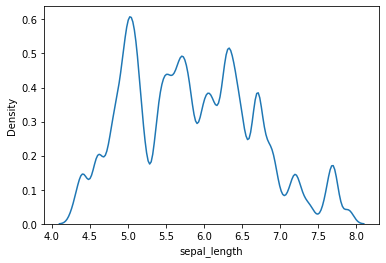

In [25]:
band_width = 1 / np.sqrt(len(x))
sns.kdeplot(x, bw = band_width)

## 2. Feature Selection

#### Implementation

In [27]:
## Load dataset & split
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

# Fit model
knn = neighbors.KNeighborsClassifier(n_neighbors = 6)
sbs = Sequential_Backwar_Selection(knn, k_features = 1)

## Scaling your dataset
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

#Train the model using the training sets
sbs.fit(X_train_std, y_train)

In [28]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 12),
 (0, 1, 2, 3, 4, 6, 7, 9, 12),
 (0, 1, 2, 3, 4, 6, 9, 12),
 (0, 1, 3, 4, 6, 9, 12),
 (0, 1, 3, 4, 6, 12),
 (0, 1, 4, 6, 12),
 (1, 4, 6, 12),
 (1, 6, 12),
 (6, 12),
 (6,)]

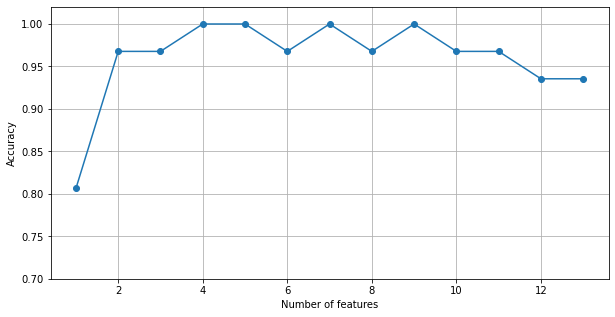

In [29]:
k_feat = [len(k) for k in sbs.subsets_]

plt.figure(figsize = (10, 5))
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02]) 
plt.ylabel('Accuracy') 
plt.xlabel('Number of features')  
plt.grid() 
plt.show()

In [39]:
smax = max(sbs.scores_)
k_best = sbs.scores_.index(smax)
k_best

4

In [44]:
k_4 = list(sbs.subsets_[k_best])
for k in k_4:
    print(wine.feature_names[k])

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
flavanoids
nonflavanoid_phenols
color_intensity
proline


In [43]:
knn.fit(X_train_std, y_train) 
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k_4], y_train) 
print('Training accuracy:', knn.score(X_train_std[:, k_4], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k_4], y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629
Training accuracy: 0.9758064516129032
Test accuracy: 0.9444444444444444


## 3. Many testing_type.
### 3.1. Define some classes

In [33]:
n = len(x)
y = len(x[x <= 5.5])
test = prop_testing(alpha = 0.05)
test.prop_1_test(n, y, 0.5)

{'p_value': 0.9955096643790506,
 'statistical_testing': -2.6127890589687235,
 'sample_estimates': 0.3933333333333333,
 'conf_interval': [0.3151601307479124, 0.47150653591875424],
 'final_claim': 'Not engough evidence to reject H0',
 'alternative': 'p = p0 (equal)'}

In [34]:
test = prop_testing(alpha = 0.01, alter = "greater")
test.prop_1_test(800, 448, 0.5)

{'p_value': 0.0006885138966450377,
 'statistical_testing': 3.394112549695431,
 'sample_estimates': 0.56,
 'conf_interval': [0.5191727605052125, 1],
 'final_claim': 'Reject H0',
 'alternative': 'p > p0 (greater)'}

In [35]:
test = prop_testing(alpha = 0.01)
test.prop_2_test(500, 600, 400, 300)

{'p_value': 0.0,
 'statistical_testing': 10.299098434883929,
 'sample_estimates (prop_samp1, prop_samp2)': (0.8, 0.5),
 'conf_interval': [0.2300878611201725, 0.3699121388798276],
 'final_claim': 'Reject H0',
 'alternative': 'p = p0 (equal)'}

## 4. Regression

In [36]:
poly_reg = Polynomial_Univariate_Regression()